In [71]:
from pathlib import Path
import numpy as np
import keras
from keras import layers

In [72]:
dataset_dir = Path('./skin_cancer_dataset/')

X_train = np.load(dataset_dir / 'train_dataset' / 'x_train.npy')
y_train = np.load(dataset_dir / 'train_dataset' / 'y_train.npy')

X_test = np.load(dataset_dir / 'test_dataset' / 'x_test.npy')
y_test = np.load(dataset_dir / 'test_dataset' / 'y_test.npy')

In [73]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (2000, 128, 128, 1)
y_train: (2000, 2)
X_test: (120, 128, 128, 1)
y_test: (120, 2)


The data are already in good shape for our model

In [74]:
print('Max X_train:', np.max(np.abs(X_train)))
print('Max X_test:', np.max(np.abs(X_test)))

Max X_train: 1.0000008
Max X_test: 1.0


# Basic model

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=y_train, test_size=0.1)

In [77]:
# Scale images to the [0, 1] range
x_train = X_train.astype("float32") / (np.max(np.abs(X_train)))
x_valid = X_valid.astype("float32") / (np.max(np.abs(X_valid)))
x_test = X_test.astype("float32") / (np.max(np.abs(X_test)))

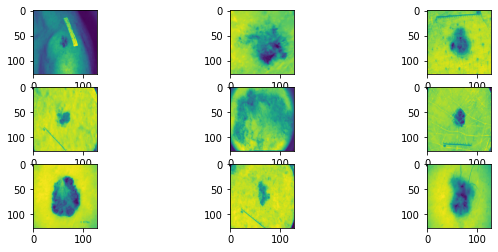

In [78]:
import matplotlib.pyplot as plt
j = 10
fig, axes = plt.subplots(int(j//3), 3, figsize=(10, 4))
axes_ = axes.flatten()
for i in range(9):
    image=X_train[i]
    axes_[i].imshow(image)
plt.show()

In [79]:
num_classes = np.unique(y_train).shape[0]
input_shape = x_train.shape[1:] # 28, 28, 1
print('Input shape:', input_shape)

Input shape: (128, 128, 1)


In [80]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Dropout(0.2),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Dropout(0.2),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
#         layers.Dense(10, activation='relu'),
#         layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 dropout_7 (Dropout)         (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 dropout_8 (Dropout)         (None, 61, 61, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [81]:
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [82]:
batch_size = 64
epochs = 100

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_valid, y_valid),
    callbacks=[early_stop])

Epoch 1/100
29/29 [==============================] - 7s 227ms/step - loss: 0.8239 - accuracy: 0.5017 - val_loss: 0.6857 - val_accuracy: 0.5450
Epoch 2/100
29/29 [==============================] - 6s 224ms/step - loss: 0.6954 - accuracy: 0.5506 - val_loss: 0.6768 - val_accuracy: 0.5000
Epoch 3/100
29/29 [==============================] - 7s 225ms/step - loss: 0.6680 - accuracy: 0.5833 - val_loss: 0.6601 - val_accuracy: 0.6700
Epoch 4/100
29/29 [==============================] - 7s 230ms/step - loss: 0.6645 - accuracy: 0.5811 - val_loss: 0.6561 - val_accuracy: 0.6150
Epoch 5/100
29/29 [==============================] - 7s 224ms/step - loss: 0.6557 - accuracy: 0.6244 - val_loss: 0.6453 - val_accuracy: 0.6900
Epoch 6/100
29/29 [==============================] - 7s 225ms/step - loss: 0.6354 - accuracy: 0.6267 - val_loss: 0.6254 - val_accuracy: 0.6500
Epoch 7/100
29/29 [==============================] - 7s 228ms/step - loss: 0.6093 - accuracy: 0.6650 - val_loss: 0.5886 - val_accuracy: 0.7050

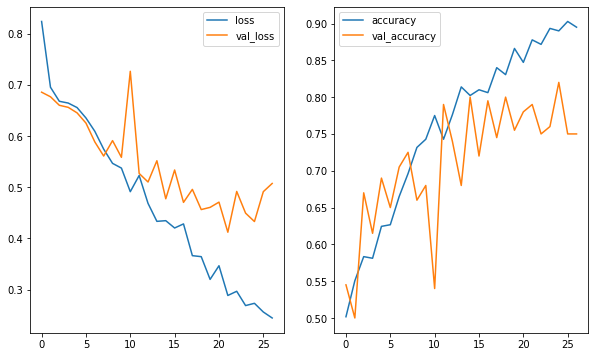

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

loss = history.history['loss']
val_loss = history.history['val_loss']
axes[0].plot(loss, label='loss')
axes[0].plot(val_loss, label='val_loss')
axes[0].legend()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
axes[1].plot(accuracy, label='accuracy')
axes[1].plot(val_accuracy, label='val_accuracy')
axes[1].legend()

plt.show()

## With ImageDataGenerator

In [88]:
from keras.preprocessing.image import ImageDataGenerator

In [89]:
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [90]:
generator = ImageDataGenerator(
    rotation_range=90,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # horizontal_flip=True,
#     validation_split=0.1
)
generator.fit(x_train)

In [91]:
batch_size = 64
epochs = 100

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
    generator.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_valid, y_valid),
    callbacks=[early_stop]
)

Epoch 1/100


/tmp/ipykernel_13523/3093018763.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


29/29 [==============================] - 7s 229ms/step - loss: 0.6968 - accuracy: 0.6411 - val_loss: 0.5211 - val_accuracy: 0.7650
Epoch 2/100
29/29 [==============================] - 7s 223ms/step - loss: 0.6077 - accuracy: 0.6889 - val_loss: 0.5050 - val_accuracy: 0.7550
Epoch 3/100
29/29 [==============================] - 7s 223ms/step - loss: 0.6036 - accuracy: 0.6928 - val_loss: 0.4649 - val_accuracy: 0.8250
Epoch 4/100
29/29 [==============================] - 7s 224ms/step - loss: 0.5647 - accuracy: 0.7183 - val_loss: 0.4578 - val_accuracy: 0.8300
Epoch 5/100
29/29 [==============================] - 7s 226ms/step - loss: 0.5754 - accuracy: 0.7178 - val_loss: 0.4533 - val_accuracy: 0.8550
Epoch 6/100
29/29 [==============================] - 7s 227ms/step - loss: 0.5586 - accuracy: 0.7211 - val_loss: 0.5000 - val_accuracy: 0.7400
Epoch 7/100
29/29 [==============================] - 7s 228ms/step - loss: 0.5684 - accuracy: 0.7139 - val_loss: 0.4680 - val_accuracy: 0.8150
Epoch 8/100

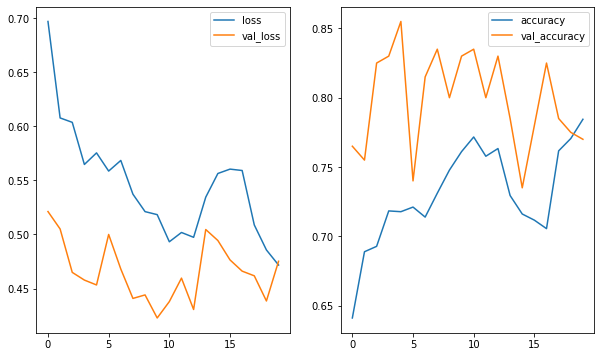

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

loss = history.history['loss']
val_loss = history.history['val_loss']
axes[0].plot(loss, label='loss')
axes[0].plot(val_loss, label='val_loss')
axes[0].legend()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
axes[1].plot(accuracy, label='accuracy')
axes[1].plot(val_accuracy, label='val_accuracy')
axes[1].legend()

plt.show()

# With VGG-16

## load and test vgg16 on test images

In [93]:
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from keras.applications.vgg16 import decode_predictions as decode_predictions_vgg16

In [95]:
vgg16 = keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [96]:
directory = Path('../data/images_test/')

In [97]:
img = load_img(directory / 'image1.jpg', target_size=(224, 224))  # Charger l'image
img = img_to_array(img)  # Convertir en tableau numpy
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
print('img shape:', img.shape) # Créer la collection d'images (un seul échantillon)
img = preprocess_vgg16(img)
print('img shap after treatment:', img.shape) # Prétraiter l'image comme le veut VGG-16

img shape: (1, 224, 224, 3)
img shap after treatment: (1, 224, 224, 3)


In [98]:
y = vgg16.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)

1/1 [==============================] - 0s 183ms/step


In [99]:
from keras.applications.vgg16 import decode_predictions

# Afficher les 3 classes les plus probables
print('Top 3 :', decode_predictions(y, top=3)[0])

Top 3 : [('n02114367', 'timber_wolf', 0.92768335), ('n02114855', 'coyote', 0.02807898), ('n02114712', 'red_wolf', 0.02400953)]


# Transfer learning

In [111]:
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from keras.applications.vgg16 import decode_predictions as decode_predictions_vgg16
from keras import Model

In [112]:
model_vgg16 = keras.applications.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(128, 128, 3) # <== VGG16 wants 3 channel
)

x = model_vgg16.output
x = layers.Flatten()(x) # Flatten dimensions to for use in FC layers
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x) # Dropout layer to reduce overfitting
y_hat = layers.Dense(2, activation='softmax')(x)

In [113]:
model_v2 = Model(inputs=model_vgg16.input, outputs=y_hat)

In [114]:
model_v2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [115]:
# Ne pas entraîner les 5 premières couches (les plus basses) 
for layer in model_v2.layers:
    layer.trainable = False
    
for layer in model_v2.layers[-7:]:
    layer.trainable = True

In [116]:
for i, layer in enumerate(model_v2.layers):
    print(i, layer.name, layer.trainable)

0 input_11 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 flatten_7 True
20 dense_13 True
21 dropout_10 True
22 dense_14 True


In [117]:
x_train_vgg = np.repeat(x_train, 3, -1)
x_valid_vgg = np.repeat(x_valid, 3, -1)
x_test_vgg = np.repeat(x_test, 3, -1)

In [118]:
generator = ImageDataGenerator(preprocessing_function=preprocess_vgg16)
generator.fit(x_train_vgg)

In [119]:
batch_size = 32
epochs = 100

In [120]:
# Compiler le modèle 
model_v2.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=["accuracy"]
)

# Entraîner sur les données d'entraînement (X_train, y_train)
history = model_v2.fit(
    x_train_vgg, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_valid_vgg, y_valid),
    callbacks=[early_stop])

Epoch 1/100
57/57 [==============================] - 44s 762ms/step - loss: 0.6322 - accuracy: 0.7272 - val_loss: 0.3856 - val_accuracy: 0.8250
Epoch 2/100
57/57 [==============================] - 47s 819ms/step - loss: 0.3502 - accuracy: 0.8439 - val_loss: 0.3923 - val_accuracy: 0.8150
Epoch 3/100
57/57 [==============================] - 47s 822ms/step - loss: 0.3487 - accuracy: 0.8322 - val_loss: 0.3725 - val_accuracy: 0.8050
Epoch 4/100
57/57 [==============================] - 47s 827ms/step - loss: 0.2964 - accuracy: 0.8672 - val_loss: 0.3551 - val_accuracy: 0.8850
Epoch 5/100
57/57 [==============================] - 47s 829ms/step - loss: 0.2608 - accuracy: 0.8922 - val_loss: 0.2877 - val_accuracy: 0.8700
Epoch 6/100
57/57 [==============================] - 47s 825ms/step - loss: 0.2396 - accuracy: 0.8939 - val_loss: 0.3302 - val_accuracy: 0.8400
Epoch 7/100
57/57 [==============================] - 47s 823ms/step - loss: 0.2214 - accuracy: 0.9100 - val_loss: 0.3456 - val_accuracy:

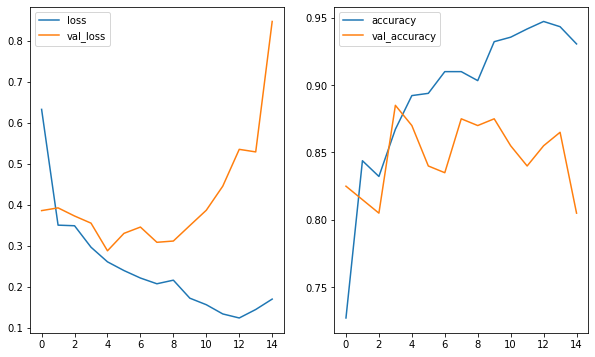

In [121]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

loss = history.history['loss']
val_loss = history.history['val_loss']
axes[0].plot(loss, label='loss')
axes[0].plot(val_loss, label='val_loss')
axes[0].legend()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
axes[1].plot(accuracy, label='accuracy')
axes[1].plot(val_accuracy, label='val_accuracy')
axes[1].legend()

plt.show()

**OBSERVATIONS**
- better performances than simple model
- but overfitting

In [126]:
generator = ImageDataGenerator(
    rotation_range=90,
    brightness_range=(30, 90),
    zoom_range=0.2,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # horizontal_flip=True,
    # validation_split=0.1
)
generator.fit(x_train)

In [127]:
# Compiler le modèle 
model_v2.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=["accuracy"]
)

# Entraîner sur les données d'entraînement (X_train, y_train)
history = model_v2.fit(
    generator.flow(x_train_vgg, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_valid_vgg, y_valid),
    callbacks=[early_stop])

Epoch 1/100
57/57 [==============================] - 44s 776ms/step - loss: 0.9193 - accuracy: 0.5111 - val_loss: 0.5909 - val_accuracy: 0.7400
Epoch 2/100
57/57 [==============================] - 47s 819ms/step - loss: 0.6934 - accuracy: 0.4989 - val_loss: 0.5897 - val_accuracy: 0.6850
Epoch 3/100
57/57 [==============================] - 47s 821ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.5855 - val_accuracy: 0.6800
Epoch 4/100
57/57 [==============================] - 47s 824ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.5844 - val_accuracy: 0.6850
Epoch 5/100
57/57 [==============================] - 47s 816ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.5843 - val_accuracy: 0.6850
Epoch 6/100
57/57 [==============================] - 46s 811ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.5844 - val_accuracy: 0.6900
Epoch 7/100
57/57 [==============================] - 47s 816ms/step - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.5846 - val_accuracy:

KeyboardInterrupt: 